<a href="https://colab.research.google.com/github/jlpontes/creditFraud-prediction/blob/main/fraud_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve graphic visualization
sns.set_style('whitegrid')
%matplotlib inline

In [23]:
df = pd.read_csv('creditcard.csv', on_bad_lines='skip')


In [24]:
df.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
df.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


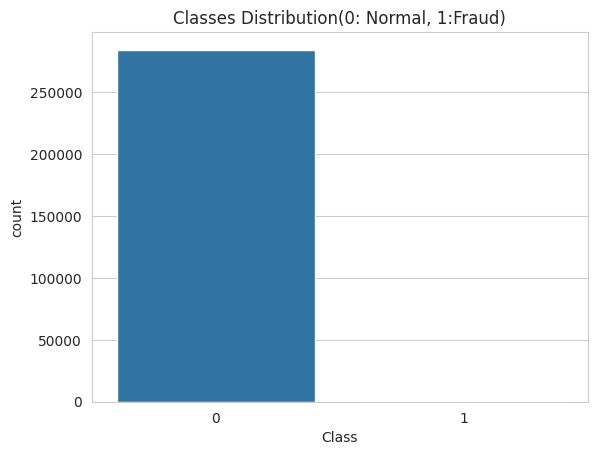

In [29]:
sns.countplot(x='Class', data=df)
plt.title('Classes Distribution(0: Normal, 1:Fraud)')
plt.show()

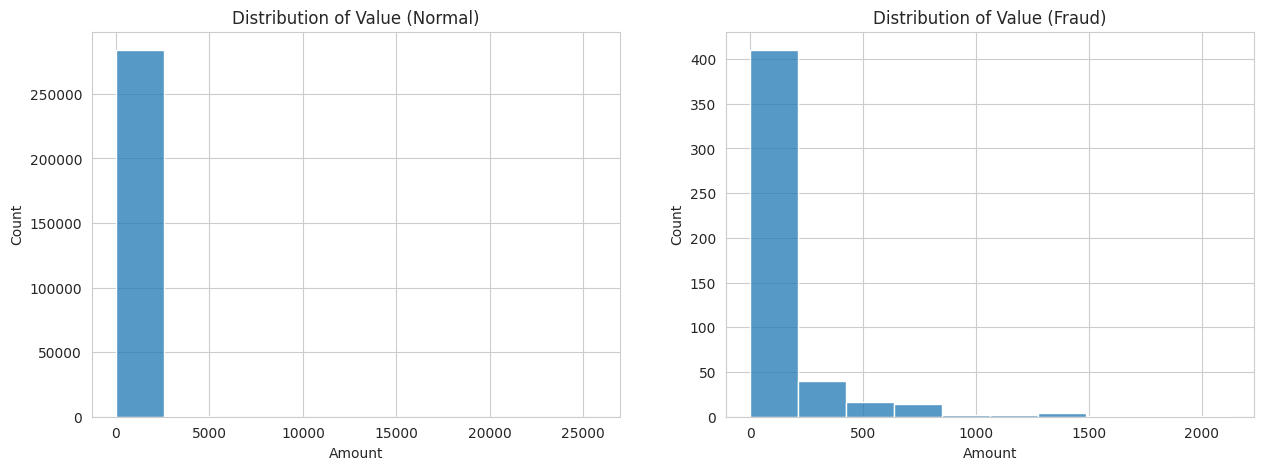

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=10, ax=ax1).set_title('Distribution of Value (Normal)')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=10, ax=ax2).set_title('Distribution of Value (Fraud)')
plt.show()


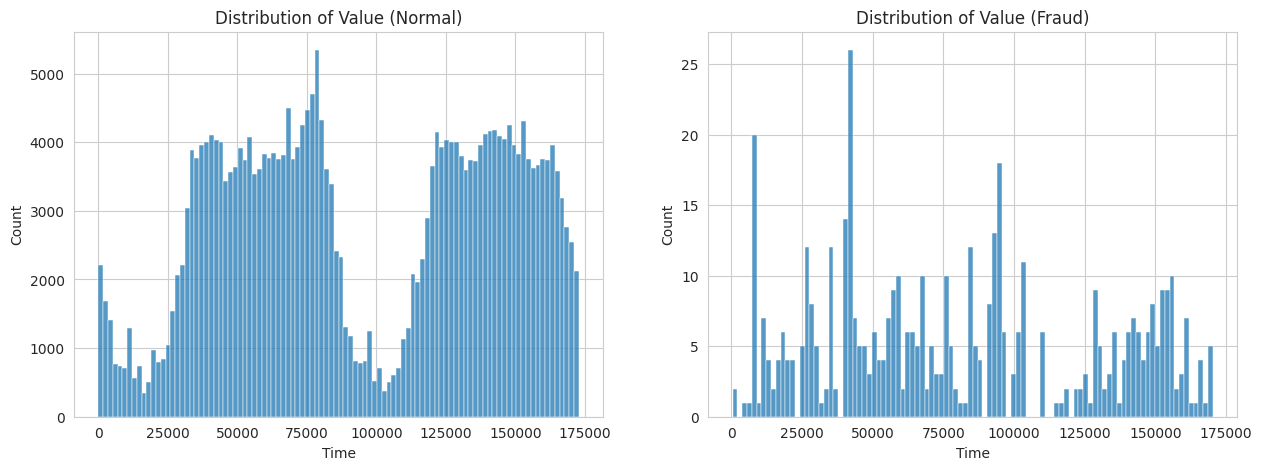

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, ax=ax1).set_title('Distribution of Value (Normal)')
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, ax=ax2).set_title('Distribution of Value (Fraud)')
plt.show()


In [32]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df.corr()
# Shows the correlation of all columns with 'Class', ordered from highest to lowest
print(correlation_matrix['Class'].sort_values(ascending=False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


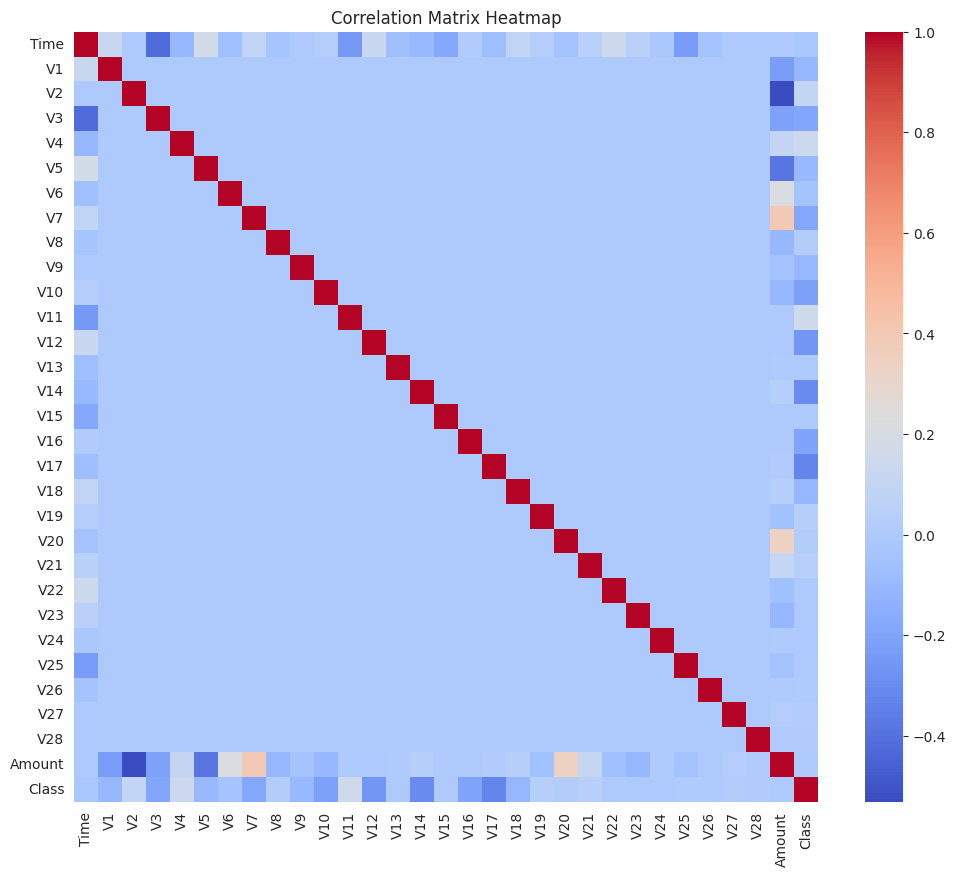

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Drop rows with any missing values after converting to numeric
df.dropna(inplace=True)

# 2. Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Split the data into training and testing sets
# We use stratify=y to ensure that the proportion of fraud is the same in the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Training data:', X_train.shape)
print('Test data:', X_test.shape)
print('Fraud proportion in training:', round(y_train.value_counts(normalize=True)[1]*100, 2), '%')
print('Fraud proportion in testing:', round(y_test.value_counts(normalize=True)[1]*100, 2), '%')

Training data: (227845, 30)
Test data: (56962, 30)
Fraud proportion in training: 0.17 %
Fraud proportion in testing: 0.17 %


In [36]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the model
# We use 'random_state' to ensure the results are reproducible
# Increased 'max_iter' to ensure the model has enough "time" to learn
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model with the TRAINING data!
print("Training the Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Training completed!")

Training the Logistic Regression model...
Training completed!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import accuracy_score

# Making predictions on test data
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 99.92%


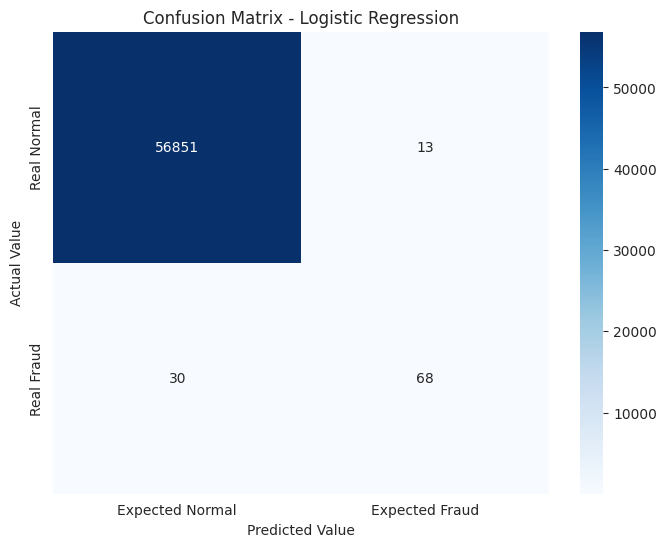


Classification Report:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     56864
   Fraud (1)       0.84      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# View the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Expected Normal', 'Expected Fraud'],
            yticklabels=['Real Normal', 'Real Fraud'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

#Generate the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Normal (0)', 'Fraud (1)']))

Training the Random Forest model... (This may take a little longer)
Training complete!

--- Random Forest Results ---


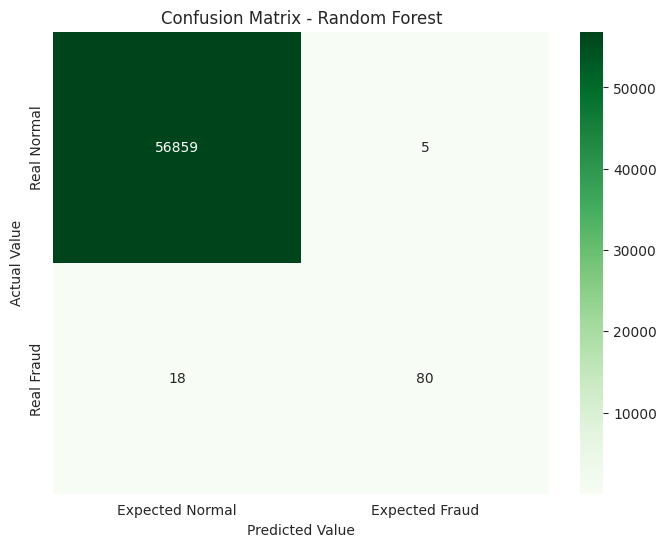


Classification Report - Random Forest:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00     56864
   Fraud (1)       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
from sklearn.ensemble import RandomForestClassifier

#1. Instantiate the expert model
# n_estimators = number of "trees/detectives" in our ensemble
# random_state for reproducibility
# n_jobs=-1 uses all of your computer's processors to speed up training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model... (This may take a little longer)")
rf_model.fit(X_train, y_train)
print("Training complete!")

# 3. Make Predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the Expert
print("\n--- Random Forest Results ---")

# Generate the Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Expected Normal', 'Expected Fraud'],
            yticklabels=['Real Normal', 'Real Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

# Generate the Classification Report
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Normal (0)', 'Fraud (1)']))

In [20]:
import joblib

#The model you trained (rf_model) is in memory. Let's save it to a file.
filename = 'fraud_model.joblib'

print(f"Saving the model to file: {filename}...")
joblib.dump(rf_model, filename)
print("Model saved successfully!")

# --- Quick Test (Optional, but recommended) ---
# Let's see if we can load the brain back and see if it still works.
print("\nLoading the model back for a test...")
loaded_model = joblib.load(filename)
print("Model loaded successfully!")

# Checking if the loaded model still produces the same results
result = loaded_model.score(X_test, y_test)
print(f"Accuracy of the loaded model in the test: {result*100:.2f}%")

Saving the model to file: fraud_model.joblib...
Model saved successfully!

Loading the model back for a test...
Model loaded successfully!
Accuracy of the loaded model in the test: 99.95%
